In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Load the dataset
file_path = '/content/customer_support_tickets.csv'  # Update path if needed
data = pd.read_csv(file_path)

In [14]:
# Display basic dataset info
print("Dataset Info:")
print(data.info())
print(data.info())
print("Available columns:", data.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   ob

In [15]:
# Handling missing values
if 'Customer Satisfaction Rating' in data.columns:
    data = data.dropna(subset=['Customer Satisfaction Rating'])
else:
    raise KeyError("Expected target column 'Customer Satisfaction Rating' not found in dataset.")

In [16]:
# Drop non-relevant columns if present
columns_to_drop = ['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Description']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')

In [17]:
# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [18]:
# Define features and target variable
target_column = 'Customer Satisfaction Rating'
X = data.drop([target_column], axis=1)
y = data[target_column]

In [19]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Train a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


# Predictions
y_pred = rfc.predict(X_test)

In [22]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.2082
Classification Report:
               precision    recall  f1-score   support

         1.0       0.20      0.19      0.20       168
         2.0       0.23      0.22      0.22       174
         3.0       0.23      0.26      0.24       175
         4.0       0.18      0.15      0.16       162
         5.0       0.20      0.21      0.20       152

    accuracy                           0.21       831
   macro avg       0.21      0.21      0.21       831
weighted avg       0.21      0.21      0.21       831

Confusion Matrix:
 [[32 39 36 29 32]
 [37 39 47 24 27]
 [28 35 46 31 35]
 [35 32 33 24 38]
 [25 28 40 27 32]]


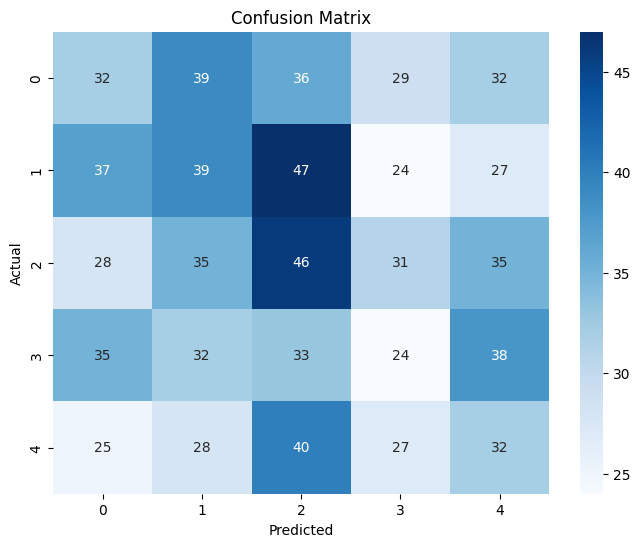

In [23]:

# Visualization of Results
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

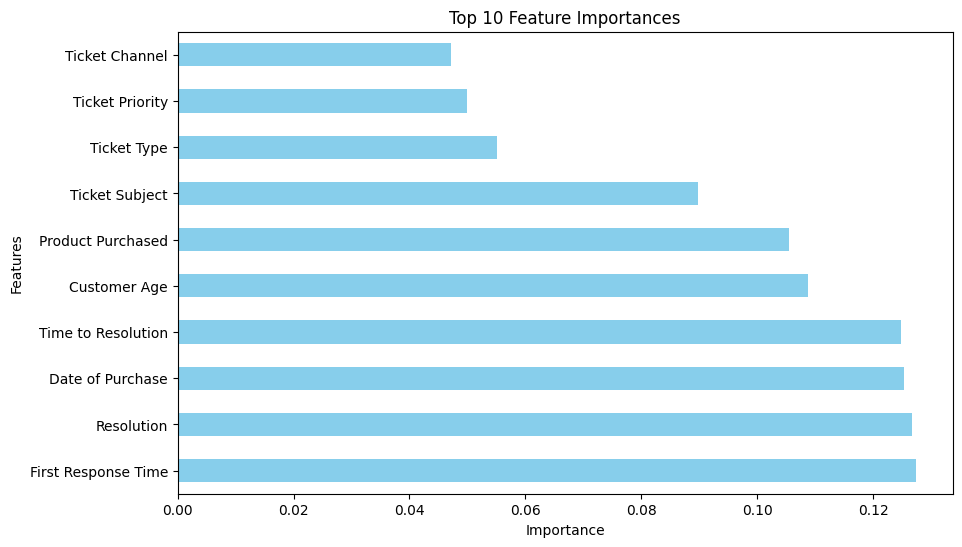

In [24]:
# Feature Importance
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [25]:
print("Customer Satisfaction Prediction Model Execution Completed!")

Customer Satisfaction Prediction Model Execution Completed!
